# Perceptron Algorithm

Make Animated Perceptron Algorithm from Lesson 2.10 [Intro to Deep Learning with PyTorch](https://www.udacity.com/course/deep-learning-pytorch--ud188) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

%matplotlib inline

In [2]:
df = pd.read_csv('data/2_10.csv')
df.head()

x1        x2  y
0  0.78051 -0.063669  1
1  0.28774  0.291390  1
2  0.40714  0.178780  1
3  0.29230  0.421700  1
4  0.50922  0.352560  1

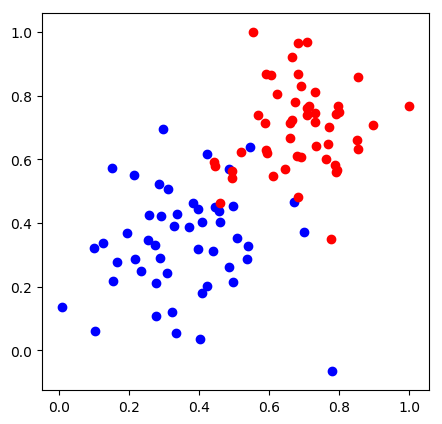

In [3]:
x1, x2, y = np.array(df['x1']), np.array(df['x2']), np.array(df['y']) 


plt.figure(figsize = (5, 5), dpi = 100, facecolor = 'w')

plt.scatter(x1[:50], x2[:50], c='b')
plt.scatter(x1[50:], x2[50:], c='r')

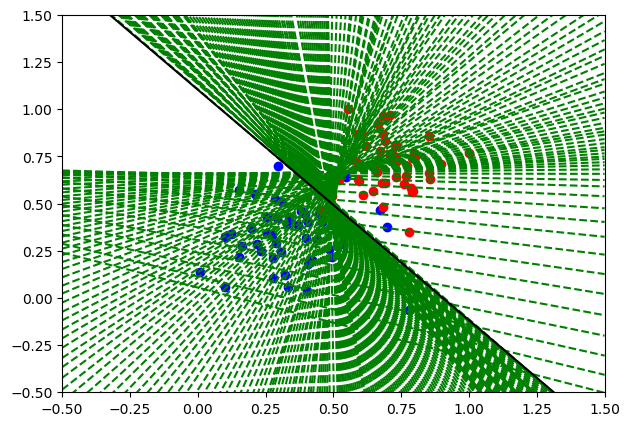

In [5]:
np.random.seed(42)


def prediction(X, W, b):
    z = X @ W.T + b
    a = np.where(z >= 0, 1, 0)
    return a


def init(w_shape, b_shape):
    """Init weigts and bias"""
    W = np.random.random_sample(w_shape)
    b = np.zeros(b_shape)
    if b_shape == 1: b = b[0]
    return W, b


def perceptronStep(X, y, W, b, learn_rate=0.1):
    e = 0
    for xi, yi in zip(X, y):
        y_hat = prediction(xi, W, b)
        if y_hat != yi:
            e += 1
            if y_hat == 0:
                W += xi * learn_rate
                b += learn_rate
            elif y_hat == 1:
                W -= xi * learn_rate
                b -= learn_rate
    return W, b, e


def train(X, y, learn_rate=0.01, num_epochs=10):
    
    W, b = init((2), 1)
    history = []
    w_history = []
    
    for i in range(num_epochs):
        W, b, e = perceptronStep(X, y, W, b, learn_rate)
        history.append((-W[0] / W[1], -b / W[1], e))
    
    return history

learn_rate = 0.001
num_epochs = 200

X = np.array(df[['x1', 'x2']])
y = np.array(df['y'])


history = train(X, y, learn_rate=learn_rate, num_epochs=num_epochs)


plt.figure(figsize = (7, 5), dpi = 100, facecolor = 'w')

xx = np.linspace(-.5, 1.5, 2)

for i in range(len(history) - 1):
    a, b, _ = history[i]
    plt.plot(xx, xx * a + b, linestyle='--', color='green')

a, b, _ = history[-1]
plt.plot(xx, xx * a + b, color='black')

plt.scatter(x1[:50], x2[:50], c='b')
plt.scatter(x1[50:], x2[50:], c='r')

plt.xlim([-.5, 1.5])
plt.ylim([-.5, 1.5]);

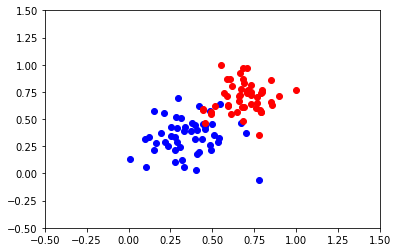

In [6]:
fig = plt.figure()

xx = np.linspace(-.5, 1.5, 2)

plots = []
for i in range(len(history)):

    a, b, e = history[i]
    plot = plt.plot(xx, xx * a + b, color='black')
    text = f'Epoch: {i + 1} - Accuracy: {(100 - e) / 100}'
    te = plt.text(90, 90, text)
    an = plt.annotate(text, xy=(0.3, 1.05), xycoords='axes fraction')
    plots.append(plot + [te, an])

plt.scatter(x1[:50], x2[:50], c='b')
plt.scatter(x1[50:], x2[50:], c='r')

plt.xlim([-.5, 1.5])
plt.ylim([-.5, 1.5])

ani = animation.ArtistAnimation(fig, plots, interval=50, blit=False, repeat_delay=100)

# To run animation in jupyter:

HTML(ani.to_jshtml())

In [7]:
# To save the animation you need ffmpeg binary
# for linux run sudo apt-get install ffmpeg

ani.save('Animated_plot.mp4')